#**Problem statement**:

Predicting Gas Turbine plant's decay state coefficient, two outputs:
**GT Compressor decay state coefficient** and **GT Turbine decay state coefficient**.

Phases of the project are as follows:
1. Data Preprocessing
2. Exploratory Data Analysis
3. Data Visualization
4. Feature Selection
5. Regression Models
6. Comparative Study



#Importing necessary Libraries for the project.

In [164]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

#import chart_studio.plotly as py
from plotly import __version__
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
#from plotly.offline import iplot, init_notebook_mode
#import plotly.graph_objs as go
cf.go_offline()

import scipy.stats as stats

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import explained_variance_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#import ipyvolume as ipv

In [150]:
#from google.colab import drive
#drive.mount('/content/drive')

#Importing Dataset

In [165]:
#data = pd.read_csv('/content/drive/MyDrive/Turbine_dataset.csv')
data = pd.read_csv('Turbine_dataset.csv')

In [166]:
data.head(10)

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980
5,5,7.148,21.0,38990.324,2678.068,9126.509,332.301,332.301,837.934,288.0,693.706,2.972,0.998,15.649,1.035,44.862,0.888,0.967,0.980
6,6,8.206,24.0,50994.854,3087.533,9311.074,438.083,438.083,930.553,288.0,734.485,3.582,0.998,18.502,1.041,60.855,1.205,0.968,0.984
7,7,6.175,18.0,29798.156,2307.217,8847.578,246.318,246.318,769.867,288.0,669.416,2.495,0.998,13.028,1.030,33.814,0.669,0.956,1.000
8,8,7.148,21.0,38999.258,2678.058,9121.944,332.401,332.401,816.202,288.0,686.368,2.979,0.998,15.558,1.036,43.461,0.861,0.986,0.989
9,9,9.300,27.0,72779.442,3560.436,9789.399,644.966,644.966,1090.551,288.0,784.201,4.477,0.998,22.250,1.049,89.860,1.779,0.955,0.997


In [167]:
data.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
data

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.088,6.0,5858.780,1349.023,6736.273,23.171,23.171,581.017,288.0,564.922,1.294,0.998,6.991,1.019,21.583,0.245,0.999,0.988
9996,5.140,15.0,21633.743,1924.349,8497.158,175.288,175.288,696.232,288.0,635.894,2.078,0.998,10.947,1.026,24.481,0.485,0.971,1.000
9997,8.206,24.0,50994.819,3087.555,9324.455,438.051,438.051,928.531,288.0,737.443,3.560,0.998,18.200,1.041,60.306,1.194,0.953,0.996
9998,6.175,18.0,29761.078,2306.850,8793.302,245.973,245.973,783.490,288.0,668.558,2.513,0.998,13.412,1.030,34.919,0.691,0.982,0.975


In [168]:
data.rename(columns={'Lever position (lp) [ ]':'Lever_position',
                     'Ship speed (v) [knots]':'Ship_speed',
                     'Gas Turbine shaft torque (GTT) [kN m]':'Gas_turbine_shaft_torque',
                     'Gas Turbine rate of revolutions (GTn) [rpm]':'Gas_turbine_rate_of_revolutions',
                     'Gas Generator rate of revolutions (GGn) [rpm]':'Gas_generator_rate_of_revolutions',
                     'Starboard Propeller Torque (Ts) [kN]':'Starboard_propeller_torque',
                     'Port Propeller Torque (Tp) [kN]':'Port_propeller_torque',
                     'HP Turbine exit temperature (T48) [C]':'HP_turbine_exit_temperature',
                     'GT Compressor inlet air temperature (T1) [C]':'GT_compressor_inlet_air_temperature',
                     'GT Compressor outlet air temperature (T2) [C]':'GT_compressor_outlet_air_temperature',
                     'HP Turbine exit pressure (P48) [bar]':'HP_turbine_exit_pressure',
                     'GT Compressor inlet air pressure (P1) [bar]':'GT_compressor_inlet_air_pressure',
                     'GT Compressor outlet air pressure (P2) [bar]':'GT_compressor_outlet_air_pressure',
                     'Gas Turbine exhaust gas pressure (Pexh) [bar]':'Gas_turbine_exhaust_gas_pressure',
                     'Turbine Injecton Control (TIC) [%]':'Turbine_injection_control',
                     'Fuel flow (mf) [kg/s]':'Fuel_flow',
                     'GT Compressor decay state coefficient.':'GT_compressor_decay_state_coefficient',
                     'GT Turbine decay state coefficient.':'GT_turbine_decay_state_coefficient'}, inplace=True)

In [169]:
data.columns

Index(['Lever_position', 'Ship_speed', 'Gas_turbine_shaft_torque',
       'Gas_turbine_rate_of_revolutions', 'Gas_generator_rate_of_revolutions',
       'Starboard_propeller_torque', 'Port_propeller_torque',
       'HP_turbine_exit_temperature', 'GT_compressor_inlet_air_temperature',
       'GT_compressor_outlet_air_temperature', 'HP_turbine_exit_pressure',
       'GT_compressor_inlet_air_pressure', 'GT_compressor_outlet_air_pressure',
       'Gas_turbine_exhaust_gas_pressure', 'Turbine_injection_control',
       'Fuel_flow', 'GT_compressor_decay_state_coefficient',
       'GT_turbine_decay_state_coefficient'],
      dtype='object')

In [170]:
data.isna().sum()

Lever_position                           0
Ship_speed                               0
Gas_turbine_shaft_torque                 0
Gas_turbine_rate_of_revolutions          0
Gas_generator_rate_of_revolutions        0
Starboard_propeller_torque               0
Port_propeller_torque                    0
HP_turbine_exit_temperature              0
GT_compressor_inlet_air_temperature      0
GT_compressor_outlet_air_temperature     0
HP_turbine_exit_pressure                 0
GT_compressor_inlet_air_pressure         0
GT_compressor_outlet_air_pressure        0
Gas_turbine_exhaust_gas_pressure         0
Turbine_injection_control                0
Fuel_flow                                0
GT_compressor_decay_state_coefficient    0
GT_turbine_decay_state_coefficient       0
dtype: int64

#Data Visualization

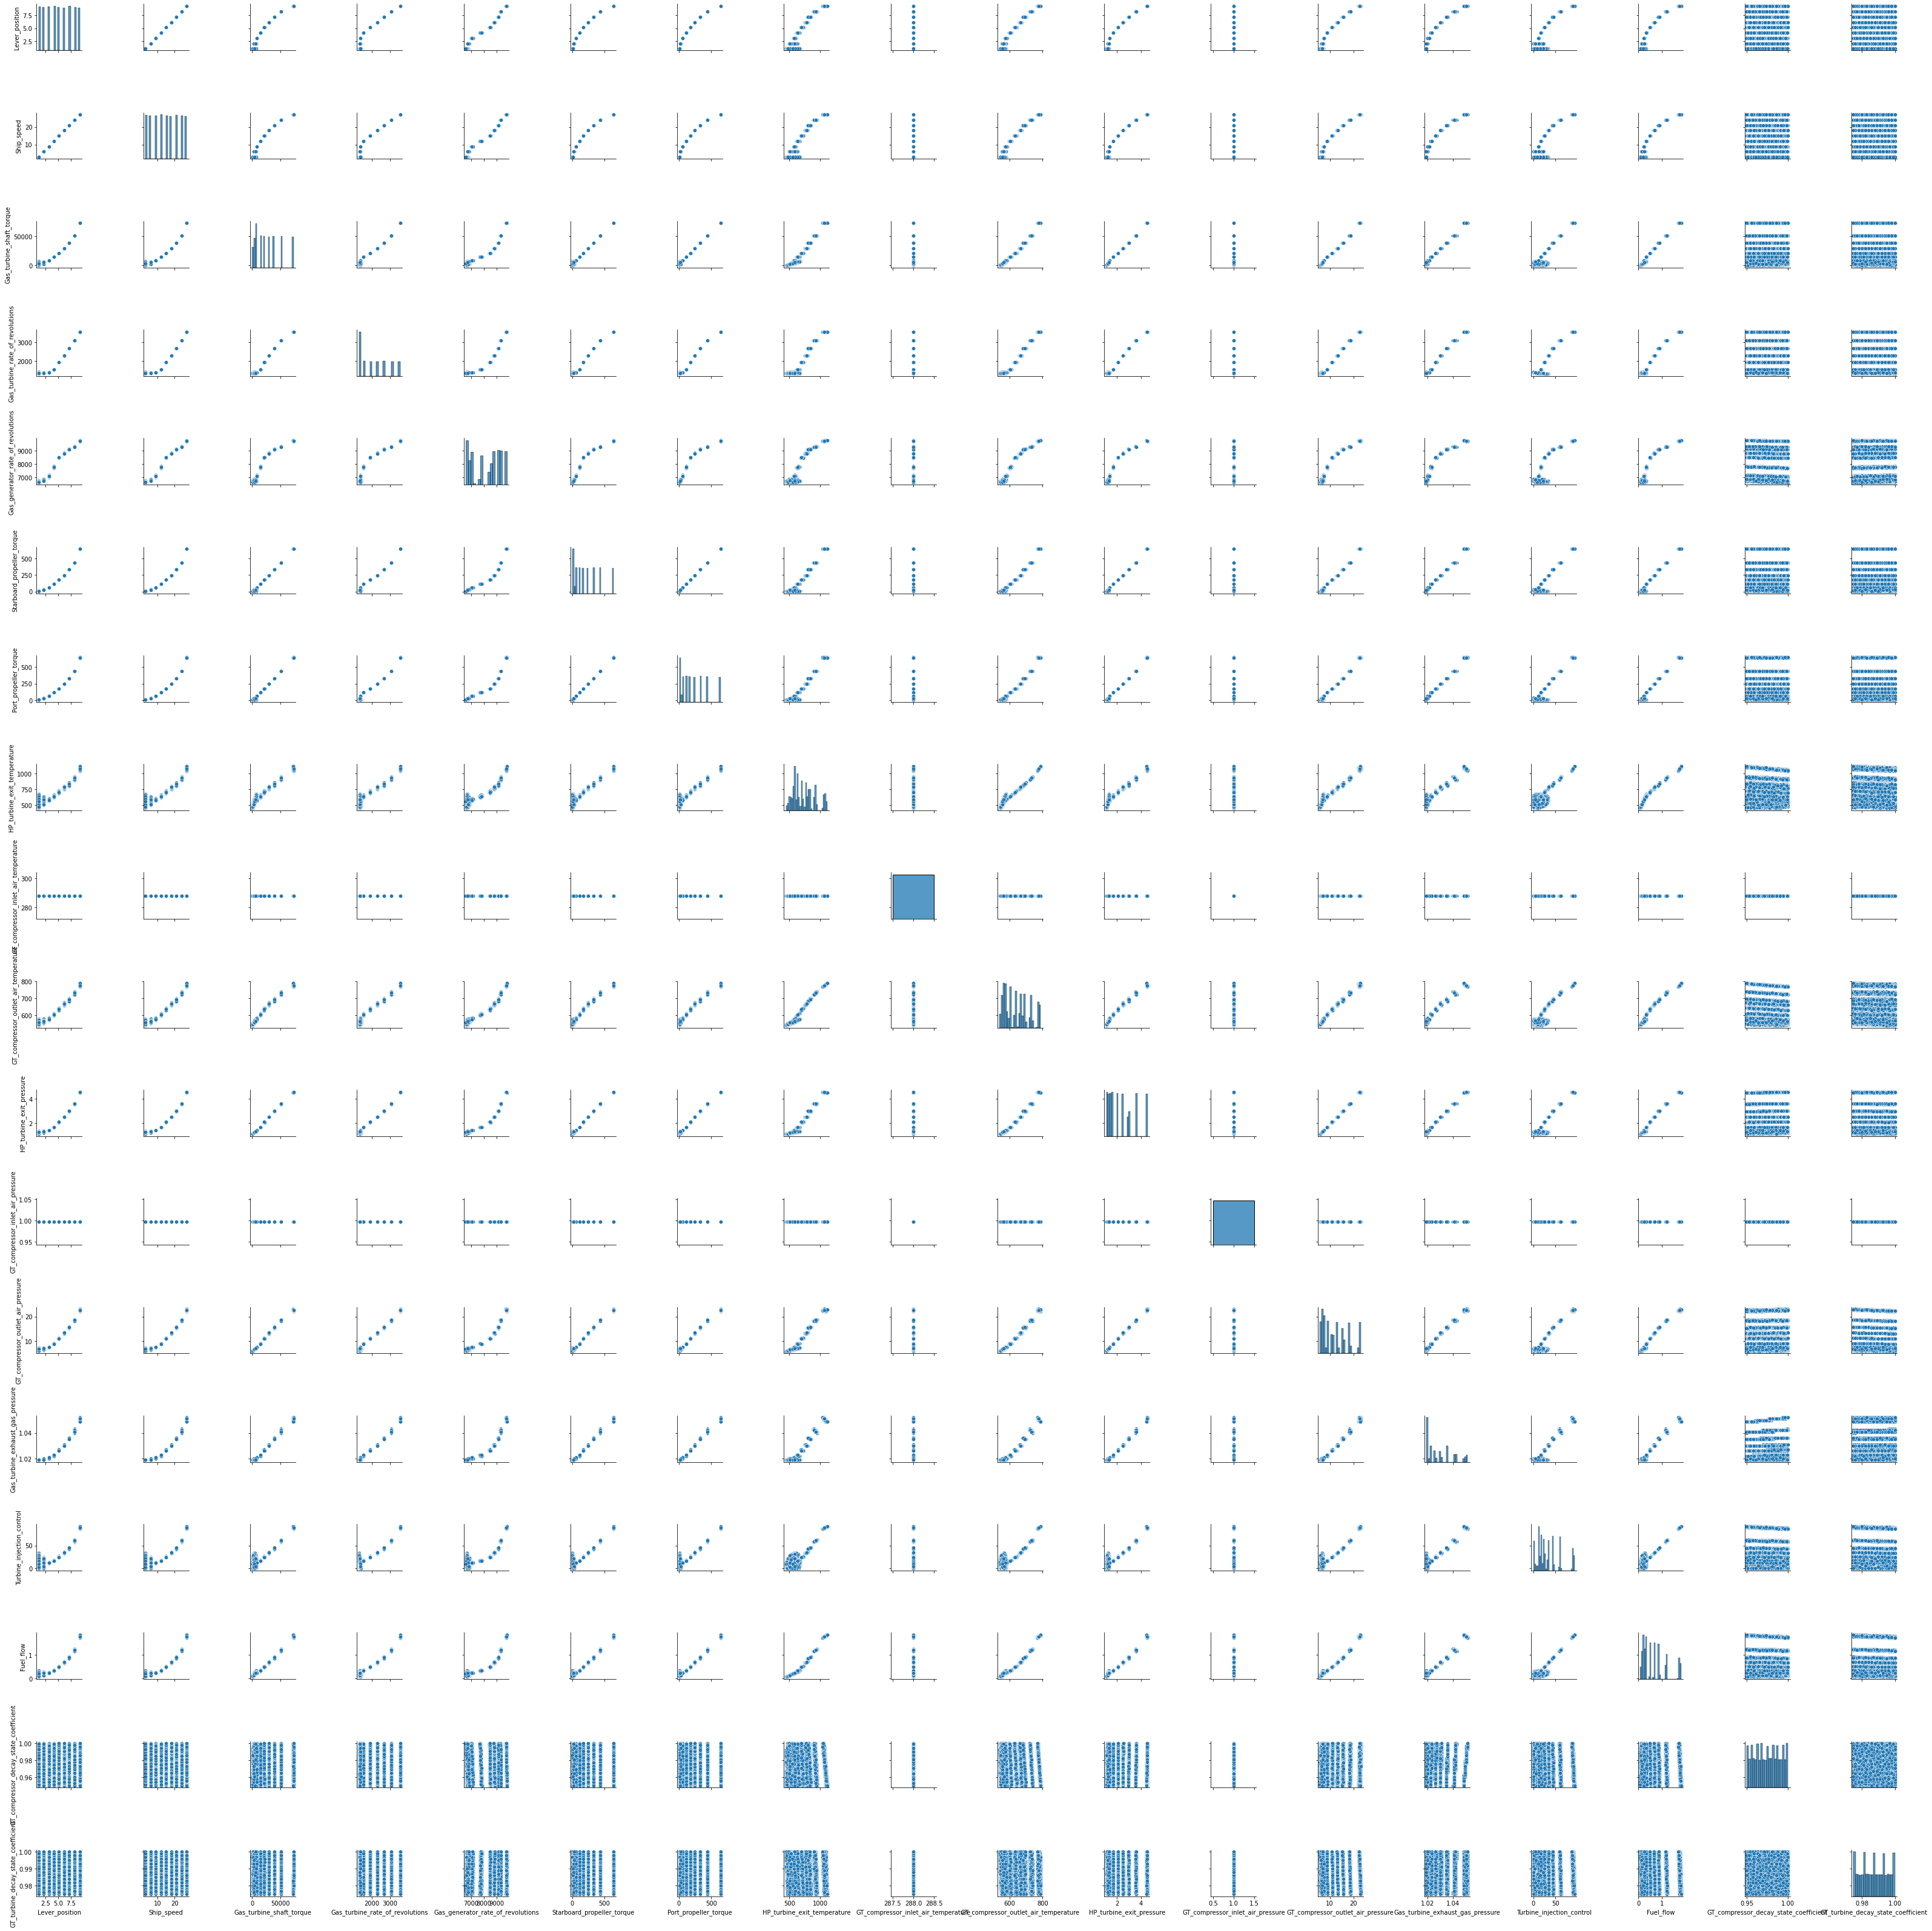

In [83]:
sns.pairplot(data)

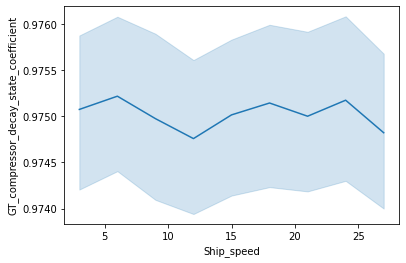

In [85]:
sns.lineplot(x = 'Ship_speed', y = 'GT_compressor_decay_state_coefficient', data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



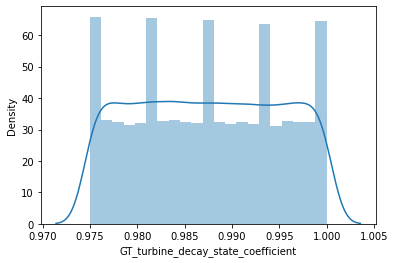

In [86]:
sns.distplot(data['GT_turbine_decay_state_coefficient'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



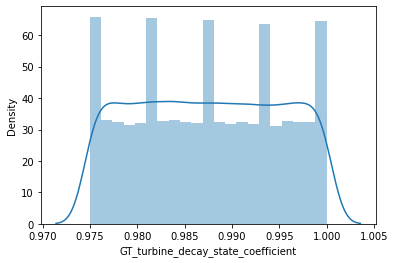

In [173]:
sns.distplot(data.GT_turbine_decay_state_coefficient)

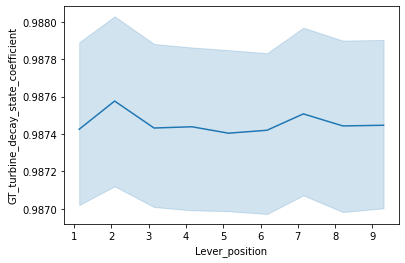

In [88]:
sns.lineplot(x = 'Lever_position', y = 'GT_turbine_decay_state_coefficient', data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



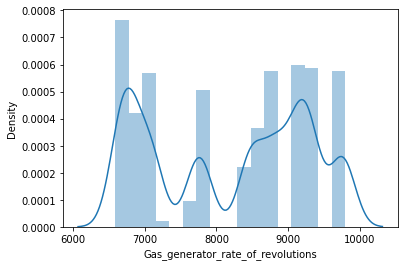

In [89]:
sns.distplot(data.Gas_generator_rate_of_revolutions)

In [157]:
data = pd.DataFrame(np.random.randn(5,18),columns='Lever_position Ship_speed Gas_turbine_shaft_torque Gas_turbine_rate_of_revolutions Gas_generator_rate_of_revolutions Starboard_propeller_torque Port_propeller_torque HP_turbine_exit_temperature GT_compressor_inlet_air_temperature GT_compressor_outlet_air_temperature HP_turbine_exit_pressure GT_compressor_inlet_air_pressure GT_compressor_outlet_air_pressure Gas_turbine_exhaust_gas_pressure Turbine_injection_control Fuel_flow GT_compressor_decay_state_coefficient GT_turbine_decay_state_coefficient'.split())

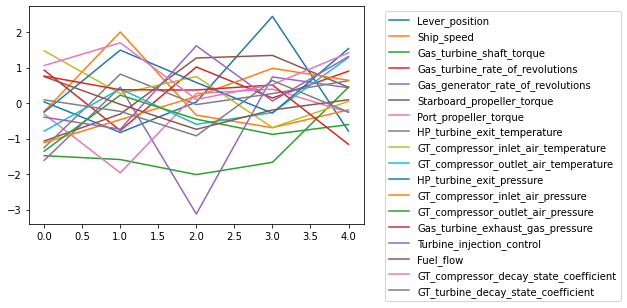

In [162]:
data.plot()
plt.legend(bbox_to_anchor=(1.05, 1))

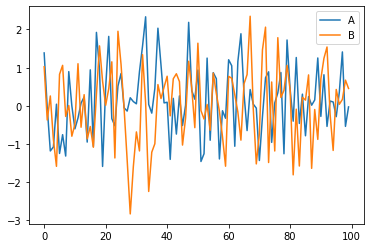

In [163]:
data = pd.DataFrame(np.random.randn(100,2),columns='A B '.split())
data.plot()

#Feature Selection




In [93]:
data.describe()

,A,B
count,100.000000,100.000000
mean,0.039539,0.084789
std,0.932486,0.912587
min,-1.885947,-2.523019
25%,-0.559018,-0.585090
50%,0.038571,0.149950
75%,0.623791,0.621667
max,2.379747,2.090736


In [174]:
#Calculate pairwise correlation of column, default = 'pearson method' standard correlation coefficient
np.round(data.corr(method = 'pearson'),4) #correlation matrix

,Lever_position,Ship_speed,Gas_turbine_shaft_torque,Gas_turbine_rate_of_revolutions,Gas_generator_rate_of_revolutions,Starboard_propeller_torque,Port_propeller_torque,HP_turbine_exit_temperature,GT_compressor_inlet_air_temperature,GT_compressor_outlet_air_temperature,HP_turbine_exit_pressure,GT_compressor_inlet_air_pressure,GT_compressor_outlet_air_pressure,Gas_turbine_exhaust_gas_pressure,Turbine_injection_control,Fuel_flow,GT_compressor_decay_state_coefficient,GT_turbine_decay_state_coefficient
Lever_position,1.0000,0.9999,0.9609,0.9617,0.9861,0.9592,0.9592,0.9607,NaN,0.9826,0.9629,-0.0,0.9689,0.9532,0.9126,0.9310,-0.0021,-0.0010
Ship_speed,0.9999,1.0000,0.9581,0.9601,0.9867,0.9564,0.9564,0.9583,NaN,0.9810,0.9604,0.0,0.9668,0.9506,0.9090,0.9274,-0.0020,-0.0010
Gas_turbine_shaft_torque,0.9609,0.9581,1.0000,0.9897,0.9332,0.9992,0.9992,0.9911,NaN,0.9903,0.9989,-0.0,0.9976,0.9960,0.9774,0.9950,0.0007,-0.0005
Gas_turbine_rate_of_revolutions,0.9617,0.9601,0.9897,1.0000,0.9429,0.9886,0.9886,0.9794,NaN,0.9892,0.9951,0.0,0.9960,0.9940,0.9619,0.9801,0.0002,-0.0007
Gas_generator_rate_of_revolutions,0.9861,0.9867,0.9332,0.9429,1.0000,0.9299,0.9299,0.9395,NaN,0.9667,0.9376,0.0,0.9460,0.9244,0.8786,0.8969,-0.0209,0.0087
Starboard_propeller_torque,0.9592,0.9564,0.9992,0.9886,0.9299,1.0000,1.0000,0.9859,NaN,0.9875,0.9980,-0.0,0.9962,0.9962,0.9770,0.9943,-0.0016,-0.0007
Port_propeller_torque,0.9592,0.9564,0.9992,0.9886,0.9299,1.0000,1.0000,0.9859,NaN,0.9875,0.9980,-0.0,0.9962,0.9962,0.9770,0.9943,-0.0016,-0.0007
HP_turbine_exit_temperature,0.9607,0.9583,0.9911,0.9794,0.9395,0.9859,0.9859,1.0000,NaN,0.9922,0.9893,-0.0,0.9904,0.9800,0.9693,0.9863,-0.0417,-0.0399
GT_compressor_inlet_air_temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GT_compressor_outlet_air_temperature,0.9826,0.9810,0.9903,0.9892,0.9667,0.9875,0.9875,0.9922,NaN,1.0000,0.9917,0.0,0.9944,0.9835,0.9582,0.9764,-0.0491,-0.0181


In [175]:
#In above correlation matrix, we see GT_compressor_inlet_air_temperature, GT_compressor_inlet_air_pressure = 0
data = data.drop('GT_compressor_inlet_air_temperature', axis=1)
data = data.drop('GT_compressor_inlet_air_pressure',axis=1)

In [176]:
#Split data into X(features),Y(results)
X = data[['Lever_position', 'Ship_speed', 'Gas_turbine_shaft_torque',
          'Gas_turbine_rate_of_revolutions', 'Gas_generator_rate_of_revolutions',
          'Starboard_propeller_torque', 'Port_propeller_torque',
          'HP_turbine_exit_temperature', 'GT_compressor_outlet_air_temperature', 
          'HP_turbine_exit_pressure', 'GT_compressor_outlet_air_pressure',
          'Gas_turbine_exhaust_gas_pressure', 'Turbine_injection_control',
          'Fuel_flow', ]]
Y1=data['GT_compressor_decay_state_coefficient']
Y2=data['GT_turbine_decay_state_coefficient']
Y = pd.DataFrame([Y1,Y2]).transpose()
Y

,GT_compressor_decay_state_coefficient,GT_turbine_decay_state_coefficient
0,0.973,0.978
1,0.995,0.975
2,0.980,0.978
3,0.984,1.000
4,0.998,0.980
...,...,...
9995,0.999,0.988
9996,0.971,1.000
9997,0.953,0.996
9998,0.982,0.975


In [177]:
scaler = StandardScaler()
var = ['Lever_position', 'Ship_speed', 'Gas_turbine_shaft_torque',
       'Gas_turbine_rate_of_revolutions', 'Gas_generator_rate_of_revolutions',
       'Starboard_propeller_torque', 'Port_propeller_torque',
       'HP_turbine_exit_temperature', 'GT_compressor_outlet_air_temperature',
       'HP_turbine_exit_pressure', 'GT_compressor_outlet_air_pressure',
       'Gas_turbine_exhaust_gas_pressure', 'Turbine_injection_control',
       'Fuel_flow', 'GT_compressor_decay_state_coefficient',
       'GT_turbine_decay_state_coefficient']
data1 = data
data1[var] = scaler.fit_transform(data1[var])
data1

,Lever_position,Ship_speed,Gas_turbine_shaft_torque,Gas_turbine_rate_of_revolutions,Gas_generator_rate_of_revolutions,Starboard_propeller_torque,Port_propeller_torque,HP_turbine_exit_temperature,GT_compressor_outlet_air_temperature,HP_turbine_exit_pressure,GT_compressor_outlet_air_pressure,Gas_turbine_exhaust_gas_pressure,Turbine_injection_control,Fuel_flow,GT_compressor_decay_state_coefficient,GT_turbine_decay_state_coefficient
0,1.581596,1.556651,2.069723,1.850934,1.430177,2.097094,2.097094,2.035294,1.856458,2.014154,1.995358,1.989602,2.214359,2.240446,-0.137159,-1.259128
1,0.390614,0.393872,0.120567,0.227505,0.537205,0.100403,0.100403,0.245345,0.272657,0.159362,0.220918,0.057762,0.043362,0.051310,1.356065,-1.658640
2,-0.764544,-0.768907,-0.848751,-0.964049,-1.047727,-0.829327,-0.829327,-0.836484,-0.899041,-0.882282,-0.882727,-0.908158,-0.816616,-0.816420,0.337958,-1.259128
3,-0.764544,-0.768907,-0.848669,-0.964037,-1.004767,-0.829222,-0.829222,-0.946964,-0.954533,-0.884132,-0.912236,-0.811566,-0.847681,-0.848118,0.609453,1.670625
4,0.390614,0.393872,0.120591,0.227505,0.539050,0.100453,0.100453,0.204501,0.247422,0.159362,0.208889,0.154354,0.026177,0.033480,1.559687,-0.992787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.167001,-1.156500,-0.962840,-1.012893,-1.336900,-1.015315,-1.015315,-0.887045,-1.115172,-0.972940,-0.990799,-1.004750,-0.462578,-0.820382,1.627561,0.072578
9996,-0.003840,0.006279,-0.247801,-0.267819,0.277828,-0.253694,-0.253694,-0.221064,-0.135969,-0.247675,-0.247267,-0.328606,-0.349905,-0.344914,-0.272907,1.670625
9997,1.164657,1.169058,1.083062,1.238587,1.036458,1.061911,1.061911,1.121701,1.265104,1.123299,1.115938,1.120274,1.042956,1.059700,-1.494637,1.137943
9998,0.390614,0.393872,0.120591,0.227537,0.549392,0.100212,0.100212,0.283316,0.314697,0.154737,0.216031,0.057762,0.055920,0.063197,0.473705,-1.658640


Visualization using grids

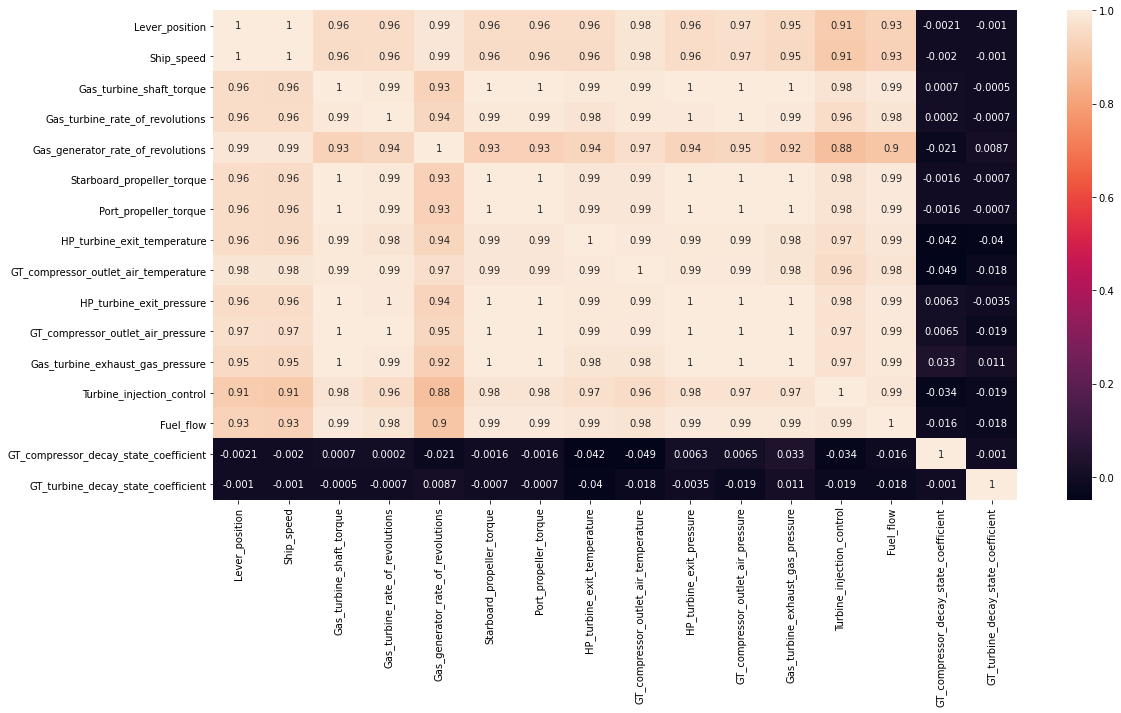

In [113]:
corr_mat= np.round(data.corr(method = 'pearson'),4)
plt.figure(figsize = (18,9))
sns.heatmap(corr_mat, annot = True)
plt.show()

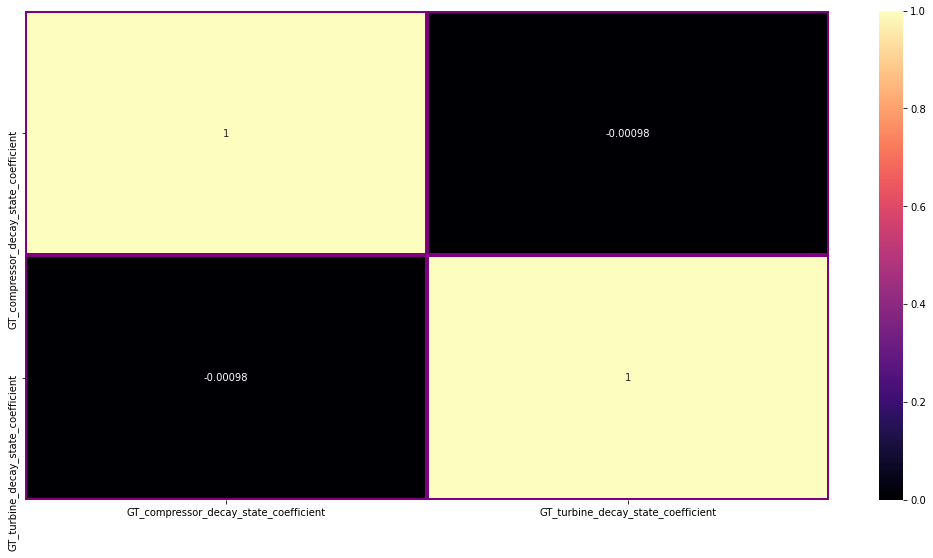

In [114]:
corr_mat= Y.corr()
plt.figure(figsize = (18,9))
sns.heatmap(corr_mat, annot = True, cmap='magma', linewidths=3, linecolor='purple')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:659: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



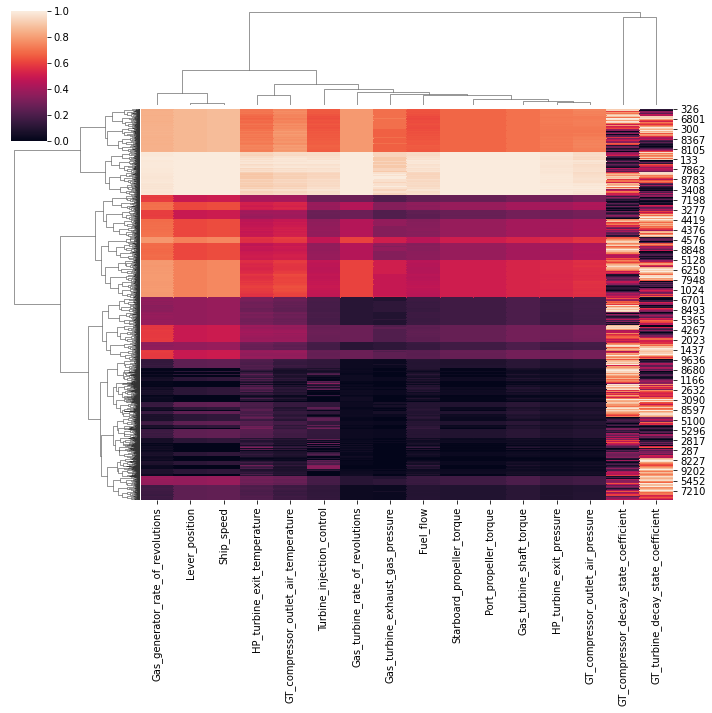

In [179]:
sns.clustermap(data,standard_scale=1)

Regression plots

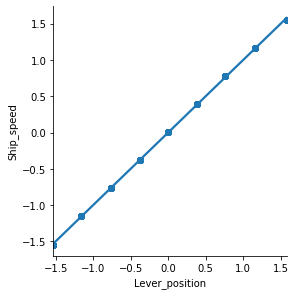

In [118]:
sns.lmplot(x='Lever_position',y='Ship_speed',data=data, height=4)

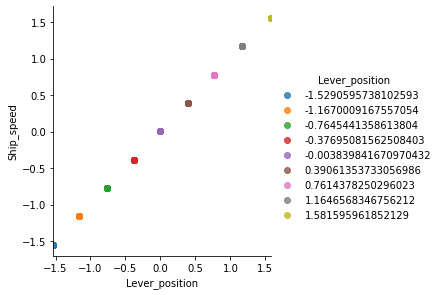

In [119]:
sns.lmplot(x='Lever_position',y='Ship_speed',data=data,hue='Lever_position',height=4)

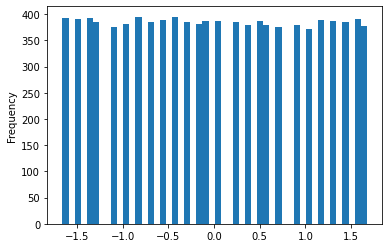

In [125]:
data['GT_turbine_decay_state_coefficient'].plot(kind='hist',bins=50)

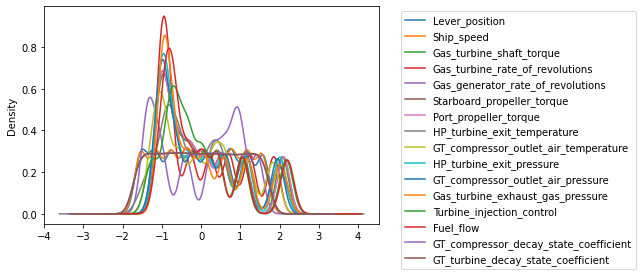

In [143]:
pd = data.plot.density()
plt.legend(bbox_to_anchor=(1.05, 1))

In [ ]:
vif = pd.DataFrame()
vif['Features'] = data1.columns
vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
5,Starboard_propeller_torque,inf
6,Port_propeller_torque,inf
0,Lever_position,64865.33
1,Ship_speed,49209.07
2,Gas_turbine_shaft_torque,48092.07
9,HP_turbine_exit_pressure,38572.28
10,GT_compressor_outlet_air_pressure,29269.76
13,Fuel_flow,25139.45
7,HP_turbine_exit_temperature,7933.99
8,GT_compressor_outlet_air_temperature,3947.47


In [181]:
#Split X,Y into train, test (70-30)
X_train1, X_test1, y1_train, y1_test = train_test_split(X, Y1, test_size = 0.3)
X_train2, X_test2, y2_train, y2_test = train_test_split(X, Y2, test_size = 0.3)

In [186]:
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Random Forest', RandomForestRegressor()))

In [187]:
#For compressor decay 
results = []
names = []
scoring = []
for name, model in models:
    # Fit the model
    model.fit(X_train1, y1_train)
    predictions = model.predict(X_test1)
    predictions_train = model.predict(X_train1)
    # Evaluate the model
    score = r2_score(y1_test, predictions)
    train_score = r2_score(y1_train, predictions_train)
    mse = mean_squared_error(predictions, y1_test)
    results.append(mse)
    names.append(name)
    msg = "%s: Train= %f, Test= %f, Error= %f" %(name, train_score, score, mse)
    print(msg)

Linear Regression: Train= 0.841284, Test= 0.845962, Error= 0.150696
KNN: Train= 0.952200, Test= 0.928920, Error= 0.069538
Decision Tree: Train= 1.000000, Test= 0.985272, Error= 0.014409
Random Forest: Train= 0.999118, Test= 0.994516, Error= 0.005365


In [188]:
#For turbine decay 
results = []
names = []
scoring = []
for name, model in models:
    # Fit the model
    model.fit(X_train2, y2_train)
    predictions = model.predict(X_test2)
    predictions_train = model.predict(X_train2)
    # Evaluate the model
    score = r2_score(y2_test, predictions)
    train_score = r2_score(y2_train, predictions_train)
    results.append(mse)
    names.append(name)
    msg = "%s: Train= %f, Test= %f, Error= %f" %(name, train_score, score, mse)
    print(msg)

Linear Regression: Train= 0.912470, Test= 0.907721, Error= 0.005365
KNN: Train= 0.917115, Test= 0.843845, Error= 0.005365
Decision Tree: Train= 1.000000, Test= 0.962418, Error= 0.005365
Random Forest: Train= 0.998181, Test= 0.988402, Error= 0.005365


#Comparision

In [190]:
rf = RandomForestRegressor(n_estimators = 110, random_state = 1)
rf.fit(X_train1, y1_train)
y1_pred = rf.predict(X_test1)

In [191]:
rf.fit(X_train2, y2_train)
y2_pred = rf.predict(X_test2)

In [192]:
y1_pred[0] #Compressor

0.5545368177467389

In [204]:
y1_test[7285] #Compressor

0.5415790813721459

In [194]:
data.iloc[5626]

Lever_position                          -1.167001
Ship_speed                              -1.156500
Gas_turbine_shaft_torque                -1.099562
Gas_turbine_rate_of_revolutions         -0.991925
Gas_generator_rate_of_revolutions       -1.257234
Starboard_propeller_torque              -1.000911
Port_propeller_torque                   -1.000911
HP_turbine_exit_temperature             -1.348581
GT_compressor_outlet_air_temperature    -1.194932
HP_turbine_exit_pressure                -1.061748
GT_compressor_outlet_air_pressure       -1.096239
Gas_turbine_exhaust_gas_pressure        -1.004750
Turbine_injection_control               -0.945851
Fuel_flow                               -1.044248
GT_compressor_decay_state_coefficient   -0.612276
GT_turbine_decay_state_coefficient       0.338919
Name: 5626, dtype: float64

In [206]:
y2_pred[0] #Turbine

1.0253529336459097

In [207]:
y2_test[9005] #Turbine

1.004772025833191

In [197]:
data.iloc[251]

Lever_position                           1.164657
Ship_speed                               1.169058
Gas_turbine_shaft_torque                 1.082813
Gas_turbine_rate_of_revolutions          1.238230
Gas_generator_rate_of_revolutions        1.012218
Starboard_propeller_torque               1.061996
Port_propeller_torque                    1.061996
HP_turbine_exit_temperature              1.107111
GT_compressor_outlet_air_temperature     1.163627
HP_turbine_exit_pressure                 1.161227
GT_compressor_outlet_air_pressure        1.212168
Gas_turbine_exhaust_gas_pressure         1.216866
Turbine_injection_control                1.063718
Fuel_flow                                1.079511
GT_compressor_decay_state_coefficient    0.745201
GT_turbine_decay_state_coefficient      -1.392298
Name: 251, dtype: float64

In [198]:
y1_test

7285    0.541579
5788   -0.340781
200     1.288192
9208    0.609453
3268   -1.223141
          ...   
3792    0.066462
8485   -0.476529
1746   -0.476529
1373    1.695435
9096   -0.748024
Name: GT_compressor_decay_state_coefficient, Length: 3000, dtype: float64

In [205]:
y2_test

9005    1.004772
5472    1.670625
2237   -0.060593
7606    1.137943
8468   -0.326934
          ...   
8679    0.338919
6706    0.605260
8173    1.137943
1880    1.271113
6497   -0.060593
Name: GT_turbine_decay_state_coefficient, Length: 3000, dtype: float64

#***